# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [88]:
#use this cell to import additional libraries or define helper functions

#import the drive module, which allows users to access files stored in their Google Drive directly from a Colab notebook(Google collab notebook)
from google.colab import drive

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [89]:
# Answer:
#Mount Google Drive to access files stored there
drive.mount('/content/drive')

# Load the dataset from Google Drive into a Pandas DataFrame
# Specify the path to the .txt file and set the delimiter to ';' for correct parsing
file_path = '/content/drive/MyDrive/AAI-530-DataAnalyticsAndIOT/household_power_consumption.txt'

# Read the .txt file into a DataFrame
df_raw = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the DataFrame to verify it loaded correctly
print(df_raw.head())

#Check data types of Date and Time columns
print(df_raw.dtypes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


<ipython-input-89-f20372dfca3e>:11: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(file_path, delimiter=';')


## DESCIPTION: The Dataframe from dataset household_power_consumption has the below Columns(Features)
Below is a detailed description of the DataFrame's head output and the associated data types.

### DataFrame Head Output Description

#### Column Descriptions
1. **Date**:
   - **Data Type**: `object` (string)
   - **Description**: Represents the date of the recorded measurements in the format `DD/MM/YYYY`. This column indicates when the power consumption data was collected.

2. **Time**:
   - **Data Type**: `object` (string)
   - **Description**: Represents the time of the recorded measurements in the format `HH:MM:SS`. This column specifies the exact time at which the power readings were taken.

3. **Global_active_power**:
   - **Data Type**: `object` (string)
   - **Description**: Indicates the total active power consumed by the household in kilowatts (kW). This value reflects the total energy usage at any given time.

4. **Global_reactive_power**:
   - **Data Type**: `object` (string)
   - **Description**: Represents the reactive power in kilowatts (kW), which is used to maintain voltage levels necessary for active power to do useful work.

5. **Voltage**:
   - **Data Type**: `object` (string)
   - **Description**: Represent the voltage in volts (V) at which power is supplied to the household.

6. **Global_intensity**:
   - **Data Type**: `object` (string)
   - **Description**: Represents the current intensity in amperes (A) flowing through the household.

7. **Sub_metering_1, Sub_metering_2, Sub_metering_3**:
   - **Data Type**:
     - `Sub_metering_1`: `object` (string)
     - `Sub_metering_2`: `object` (string)
     - `Sub_metering_3`: `float64`
   - **Description**: These columns represent energy consumption from different sub-meters within the household:
     - `Sub_metering_1`: Typically represents energy consumption for kitchen appliances.
     - `Sub_metering_2`: Usually indicates energy consumption for laundry appliances.
     - `Sub_metering_3`: Often reflects energy consumption for heating and cooling systems.

### Data Types Summary
- The output also indicates that many columns are stored as `object` types, which suggests that they may contain string representations of numeric values rather than being stored as numeric types (like float or int). This can lead to issues when performing numerical operations.
- The warning message (`DtypeWarning`) indicates that columns such as `Global_active_power`, `Global_reactive_power`, and others have mixed types, which can occur if there are non-numeric entries or if some entries are formatted differently within those columns.





In [90]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [91]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [92]:
df_raw.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [93]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [94]:
#create your Datetime column
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

# Step 6: Create your Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [95]:
#convert all data columns to numeric types
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                   'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [96]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [97]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]


It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [98]:
df.Date[0]

datetime.date(2006, 12, 16)

In [99]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [100]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Datetime                     0
dtype: int64


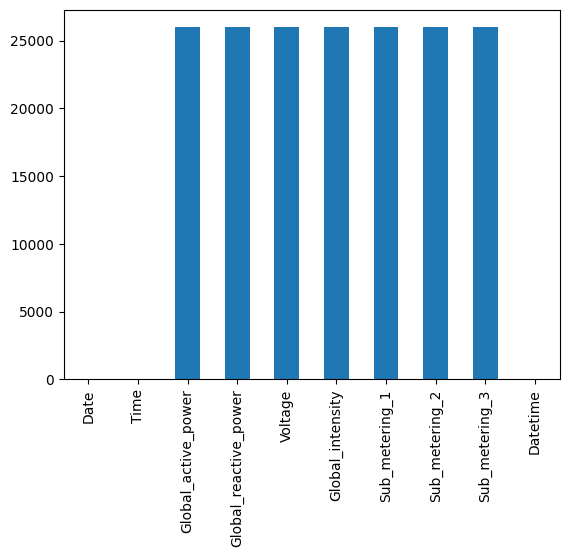

In [101]:
df.isna().sum().plot.bar()
print(df.isna().sum())


<Axes: xlabel='Date'>

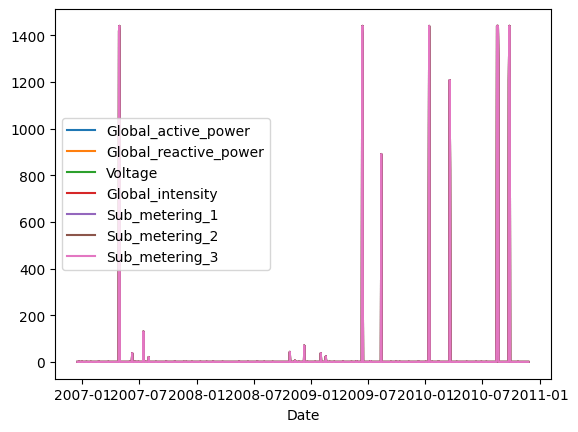

In [102]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])


### Code Breakdown

1. **Dropping the 'Date' Column**:
   ```python
   df_na = df.drop('Date', axis=1)
   ```
   - This line creates a new DataFrame, `df_na`, by dropping the 'Date' column from the original DataFrame `df`.
   - The `axis=1` argument specifies that  a column is dropped. After this operation, `df_na` will contain all columns from `df` except for 'Date'.

2. **Checking for Missing Values**:
   ```python
   .isna()
   ```
   - The `.isna()` method is called on `df_na`. This method returns a DataFrame of the same shape as `df_na`, where each entry is `True` if the corresponding entry in `df_na` is missing (i.e., NaN) and `False` otherwise.

3. **Grouping by Date and Summing Missing Values**:
   ```python
   .groupby(df.Date, sort=False).sum().reset_index()
   ```
   - This portion groups the boolean DataFrame (from `.isna()`) by the original 'Date' column from `df`.
   - The `sort=False` argument keeps the order of dates as they appear in the original DataFrame.
   - The `.sum()` method then calculates the sum of missing values for each date, treating `True` as 1 and `False` as 0. This results in a count of missing values for each date.
   - Finally, `.reset_index()` is called to convert the grouped data back into a DataFrame format with a default integer index.

4. **Plotting Missing Values**:
   ```python
   df_na.plot(x='Date', y=df_na.columns[2:-1])
   ```
   - This line generates a plot using Matplotlib (via Pandas' built-in plotting capabilities).
   - The x-axis is set to 'Date', and the y-axis is set to all columns from index 2 to the second-to-last column of `df_na`. This means that it will plot the counts of missing values for each relevant variable against their corresponding dates.
   - The plot will visualize how many missing values exist for each variable over time.


**Q: What do you notice about the pattern of missing data?**

A: There are 25979 (1.25%) missing rows for Global active power, Global Reactive power, Voltage, Global intensity, sub_metering_1, submetering_2, submetering_3 columns in the dataset household_power_consumption_data.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: The method chosen for handling missing values often depends on the nature of the data, the amount of missingness, and the specific goals of the analysis. Here are several common methods for dealing with missing data, along with their advantages and considerations. There are many methods to clean missing data such as Forward Fill, Backward fill, Linear Interpolation, KNN,Imputation and Listwise deletion.

The current percent of missing data is 1.25%.

Linear interpolation is particularly well-suited for cleaning datasets with a small percentage of missing data (like 1.25%) due to several reasons:

1. **Assumption of Continuity**: Linear interpolation assumes that the data points are connected and that changes between adjacent points occur in a linear fashion. This is often a reasonable assumption in time series data, where values typically change gradually over time, making linear interpolation effective for estimating missing values based on surrounding data points.

2. **Preservation of Trends**: By filling in missing values based on the linear relationship between existing data points, linear interpolation helps maintain the overall trend and structure of the dataset. This is especially important when analyzing time series data, as it minimizes distortion that could arise from more aggressive imputation methods.

3. **Simplicity and Efficiency**: Linear interpolation is straightforward to implement and computationally efficient, making it an attractive option for datasets with a low percentage of missing values. Given that only a small fraction of data is missing, this method allows for quick recovery without significantly altering the dataset's characteristics.

In summary, linear interpolation effectively fills gaps in datasets with minimal missing data by leveraging the relationships between existing values, preserving trends, and providing a simple yet efficient solution for imputation.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [112]:
#clean up missing data here
#Liner Interpolation, Forward Fill and Backward fill methods are used to clean data in dataset

# Linear Interpolation
# Infer better dtypes for object columns
df = df.infer_objects()

# Linear Interpolation
df_interpolated = df.interpolate(method='linear')
print(df_interpolated.isna().sum())

# Display the results
print("\nDataFrame after Linear Interpolation:")
print(df_interpolated)


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

DataFrame after Linear Interpolation:
                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   

In [104]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259
mean,1.0903,0.1236,240.8328,4.6215,1.1095,1.2892,6.4424,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3100,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6140,0.1000,241.0000,2.7516,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8700,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0526,0.1124,3.2378,4.4244,6.1158,5.7866,8.4159,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: In the provided dataset, I have chosen the following four variables for visualization over time:
## FOUR VARIABLES CHOSEN:

1. **Global Active Power**:
   - **Reason for Selection**: This variable represents the total active power consumed by household appliances and is a key indicator of energy usage. Analyzing its trend over time can provide insights into overall energy consumption patterns and how they change with seasons or events.

2. **Global Reactive Power**:
   - **Reason for Selection**: Reactive power is essential for maintaining voltage levels necessary for the operation of electrical equipment. Comparing reactive power with active power can help understand the efficiency of energy usage and the relationship between real power consumption and reactive power demand.

3. **Voltage**:
   - **Reason for Selection**: Voltage levels are crucial for the stability of the electrical grid. Monitoring voltage over time can reveal fluctuations that might indicate issues with supply or demand, and understanding these trends can help in managing grid stability.

4. **Global Intensity**:
   - **Reason for Selection**: Global intensity measures the current flowing through the system and is directly related to both active and reactive power. Analyzing this variable alongside active and reactive power can provide a comprehensive view of energy consumption dynamics and help identify periods of high load or stress on the system.

### THE REASON FOR THESE VARIABLES BEING INTERESTING TO COMPARE:

- **Interrelationships**: These variables are interconnected in the context of electrical systems. For example, higher active power consumption typically leads to increased current (global intensity) and may affect voltage levels. By comparing these variables, we can gain insights into how changes in one aspect of energy consumption influence others.

- **Operational Insights**: Understanding how these variables behave over time can help utilities optimize their operations, manage loads effectively, and ensure reliable service delivery. For instance, identifying patterns in peak usage times can inform demand response strategies.

- **Impact of External Factors**: These variables may respond differently to external factors such as weather changes, holidays, or economic activities. Analyzing them together can help identify correlations that may not be apparent when looking at each variable in isolation.

- **Efficiency Assessment**: By comparing active and reactive power, we can assess how efficiently energy is being used over time. This is important for improving energy efficiency initiatives and reducing waste.

### CONCLUSION

The selected variables provide a holistic view of energy consumption and system performance, making them valuable for analysis over time. Their interrelated nature allows for deeper insights into operational efficiency, demand management, and grid stability, which are critical for energy providers and consumers alike.

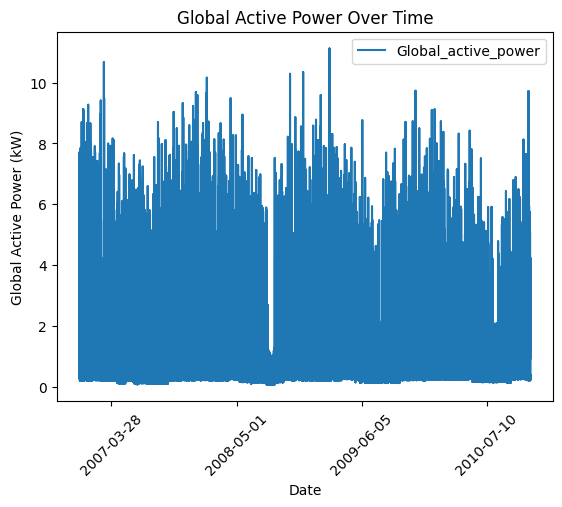

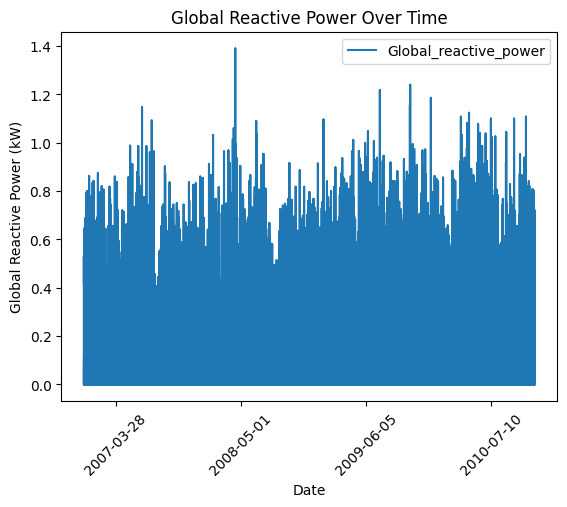

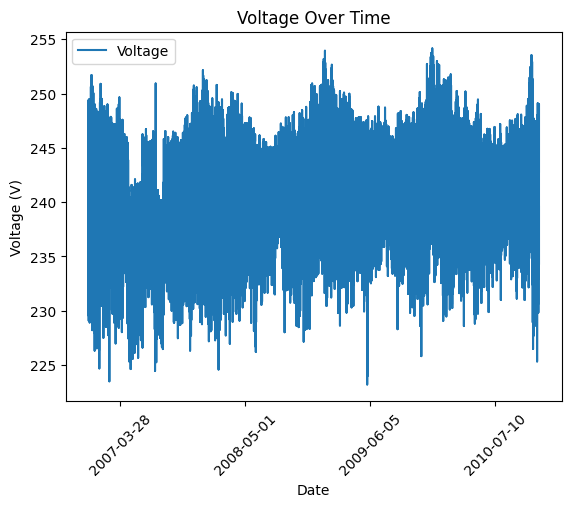

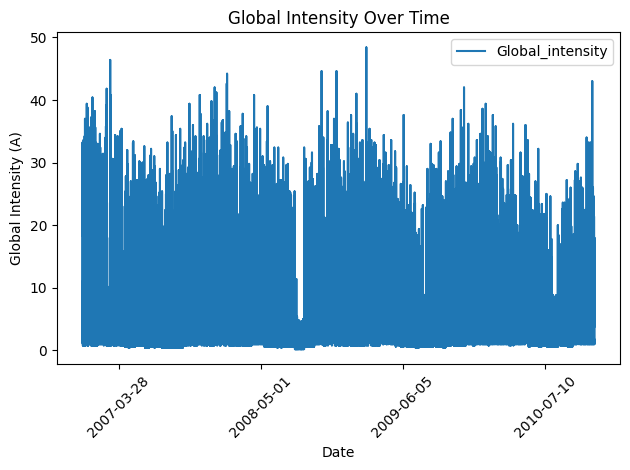

In [105]:
#build your line chart here
ax1 = df.plot(x='Date', y='Global_active_power', title='Global Active Power Over Time')
ax1.set_ylabel('Global Active Power (kW)')
ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust number of ticks for spacing
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readabilit

ax2 = df.plot(x='Date', y='Global_reactive_power', title='Global Reactive Power Over Time')
ax2.set_ylabel('Global Reactive Power (kW)')
ax2.set_xlabel('Date')
ax2.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust number of ticks for spacing
ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

ax3 = df.plot(x='Date', y='Voltage', title='Voltage Over Time')
ax3.set_ylabel('Voltage (V)')
ax3.set_xlabel('Date')
ax3.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust number of ticks for spacing
ax3.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

ax4 = df.plot(x='Date', y='Global_intensity', title='Global Intensity Over Time')
ax4.set_ylabel('Global Intensity (A)')
ax4.set_xlabel('Date')
ax4.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust number of ticks for spacing
ax4.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()  # Adjust layout to prevent overlap and show the plots
plt.show()

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A: VISUALIZATION OF RAW DATA:

Visualizing raw data provides several insights and benefits, making it a useful practice in data analysis. Here are some observations regarding the effectiveness of visualizing raw data:

1. **Clarity and Understanding**: Visualizations transform complex datasets into intuitive graphics, allowing viewers to quickly grasp trends, patterns, and relationships that may be obscured in raw numerical formats. This simplification enhances comprehension for both technical and non-technical audiences, facilitating better communication of insights.

2. **Identification of Trends and Patterns**: Graphical representations make it easier to spot trends over time, such as increases or decreases in values, seasonal effects, or anomalies. For example, a line chart can clearly show fluctuations in energy consumption or production metrics, enabling stakeholders to make informed decisions based on observed behaviors.

3. **Enhanced Decision-Making**: By visualizing data, organizations can quickly identify actionable insights and emerging trends that might otherwise remain hidden in raw data. This leads to faster and more effective decision-making processes, as visualized data allows for immediate recognition of critical issues or opportunities.

### CONCLUSION

Overall, visualizing raw data is a highly useful practice that enhances understanding, reveals important insights, and supports informed decision-making. It transforms complex information into accessible formats that facilitate analysis and communication across various stakeholders. If you have further questions or need additional insights on this topic, feel free to ask!

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

In [106]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

# Convert Date and Time to a single Datetime column
df_raw['Datetime'] = pd.to_datetime(df_raw['Date'] + ' ' + df_raw['Time'], format='%d/%m/%Y %H:%M:%S')

# Make a copy of the raw data
df = df_raw.copy()

# Convert relevant columns to numeric types, coercing errors to NaN
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                   'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if any)
df.dropna(inplace=True)

# Set the Datetime column as the index
df.set_index('Datetime', inplace=True)

# Resample to compute monthly averages for numeric columns only
monthly_avg = df.resample('ME')[numeric_columns].mean()

# Display the results
print("Monthly Averages:")
print(monthly_avg)


Monthly Averages:
            Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                             
2006-12-31             1.901295               0.131386  241.441125   
2007-01-31             1.546034               0.132676  240.905101   
2007-02-28             1.401084               0.113637  240.519390   
2007-03-31             1.318627               0.114747  240.513469   
2007-04-30             0.891189               0.118778  239.400026   
2007-05-31             0.985862               0.115343  235.178364   
2007-06-30             0.826814               0.146395  238.875530   
2007-07-31             0.667367               0.127481  237.671247   
2007-08-31             0.764186               0.112816  237.937241   
2007-09-30             0.969318               0.126011  239.424108   
2007-10-31             1.103911               0.093444  239.725826   
2007-11-30             1.294473               0.096553  240.869262   
20

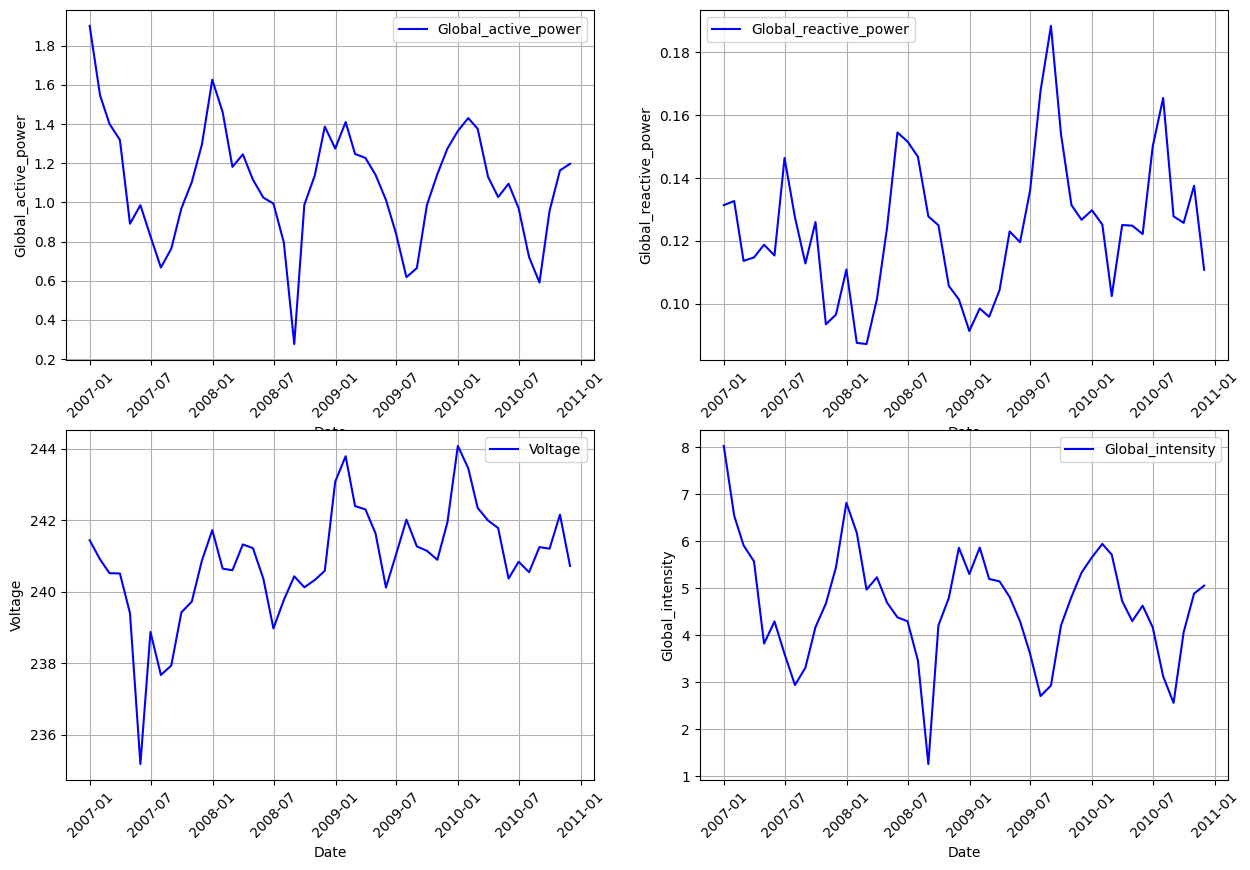

In [107]:
#build your linechart here
# Choose four variables to visualize
variables_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Create separate line charts for each variable's monthly average
plt.figure(figsize=(15, 10))

for i, variable in enumerate(variables_to_plot):
    plt.subplot(2, 2, i + 1)  # Create a grid of subplots (2 rows, 2 columns)
    plt.plot(monthly_avg.index, monthly_avg[variable], label=variable, color='b')
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid()
    plt.legend()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

##ANSWER:
## MONTHLY AVERAGE :
A monthly average calculates the mean of data points for a specific month, summarizing all data within that month into a single value. Each month is treated independently, and averages are computed for each month based on the available data.
Unlike moving averages, monthly averages do not change unless new data for that specific month is added. For example, the average for January 2025 remains constant until more January 2025 data is included or until January 2026 arrives.
##PATTERNS SEEN IN MONTHLY DATA:
##1)GLOBAL ACTIVE POWER:
This is the actual power that performs useful work, such as lighting a bulb or running a motor. It is measured in watts (W) and is the product of the voltage, current, and the cosine of the phase angle between them (P=VIcosϕ).
 This seems to exhibit a cyclical pattern, with peaks and troughs recurring at regular intervals. This could suggest seasonal variations in energy consumption. When active power increases, it often means that the load on the system is increasing, such as more motors running or more lights being turned on.

 #Peak Active Power during January month of every year:
 It is at it's peak during January month of years 2007(1.8), 2008(1.6), 2009(1.4), 2010(1.4) and 2011(1.2). This indicates the seasonal consumption of more Active Power during the January month of every year leading to Peak consumption of power.

 # Medium Active Power:
 The Active Power consumption is medium during June or July months of very year and again during October month of every year
 For instance the Active power was medium, 1.0 during 2007-6, 2007-10, 2008-7, 2008-10, 2009-06, 2009-10, 2010-07 , 2010-10.

 #Low Active Power during August month of every year:
 The Active Power consumed is low during August month of years 2007(0.7), 2008((0.28), 2009(0.63), 2010(0.6).

## 2) GLOBAL REACTIVE POWER:
 This also shows a cyclical pattern, but with higher amplitude fluctuations compared to Global Active Power. The peaks and troughs seem to align somewhat with those of Global Active Power, indicating a potential relationship between the two. The Global Reactive Power appears to reach a trough when the Global Active power is at the peak.
This power does not perform any useful work but is necessary to maintain the voltage levels in the system. It is measured in volt-amperes reactive (VAR) and is the product of the voltage, current, and the sine of the phase angle between them (Q=VIsinϕ). Reactive power is associated with the energy stored and released by inductive and capacitive components in the circuit

 ## 3) Voltage:
 The voltage appears relatively stable with minor fluctuations around a mean value. This suggests a consistent power supply.
Global Intensity: Similar to Global Active Power, Global Intensity shows a cyclical pattern with peaks and troughs. The pattern seems to be in sync with Global Active Power, which is expected as intensity is directly related to power consumption.
Possible Interpretations:

The cyclical patterns in Global Active Power, Global Reactive Power, and Global Intensity likely reflect daily and/or seasonal variations in energy demand.
The relatively stable voltage indicates a reliable power supply.
The relationship between Global Active Power and Global Intensity suggests that higher power consumption is associated with increased current flow.

## REASON FOR DECREASE IN REACTIVE POWER WHEN ACTIVE POWER INCREASES:
##a) Inductive Loads:
Many electrical devices like motors and transformers are inductive in nature. When these loads are heavily utilized (high active power), they may require less reactive power to establish and maintain the magnetic fields necessary for their operation.
##2) Power Factor Correction:
Some systems use power factor correction devices (like capacitors) to reduce reactive power.

 When active power demand increases, these devices might be more actively engaged to improve the power factor and minimize reactive power consumption


## VARIABLES SEEM TO MOVE TOGETHER:


**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

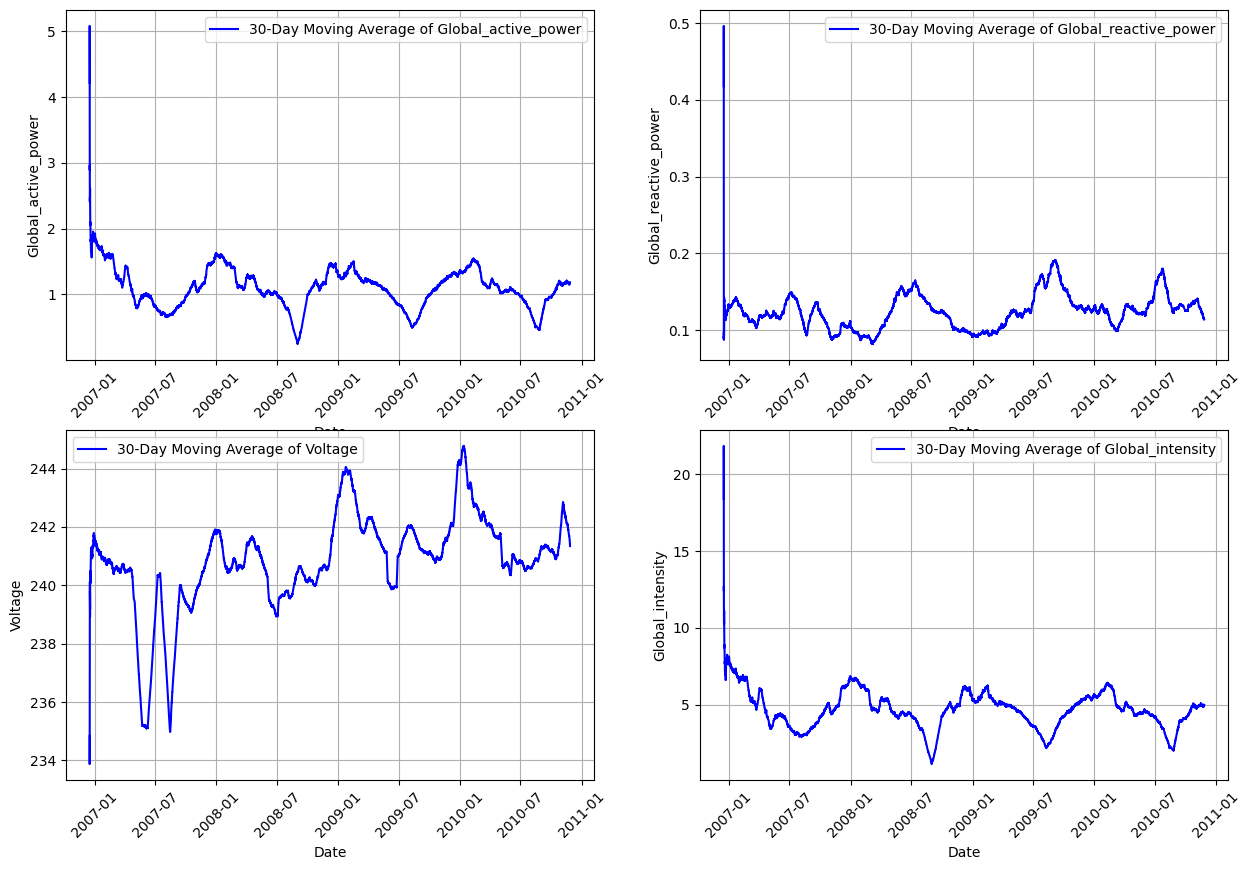

In [108]:
#compute your moving average here
#Compute the 30-day moving average for numeric columns
moving_avg_30d = df[numeric_columns].rolling(window='30D').mean()

# Choose four variables to visualize
variables_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Create separate line charts for each variable's 30-day moving average
plt.figure(figsize=(15, 10))

for i, variable in enumerate(variables_to_plot):
    plt.subplot(2, 2, i + 1)  # Create a grid of subplots (2 rows, 2 columns)
    plt.plot(moving_avg_30d.index, moving_avg_30d[variable], label=f'30-Day Moving Average of {variable}', color='b')
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid()
    plt.legend()

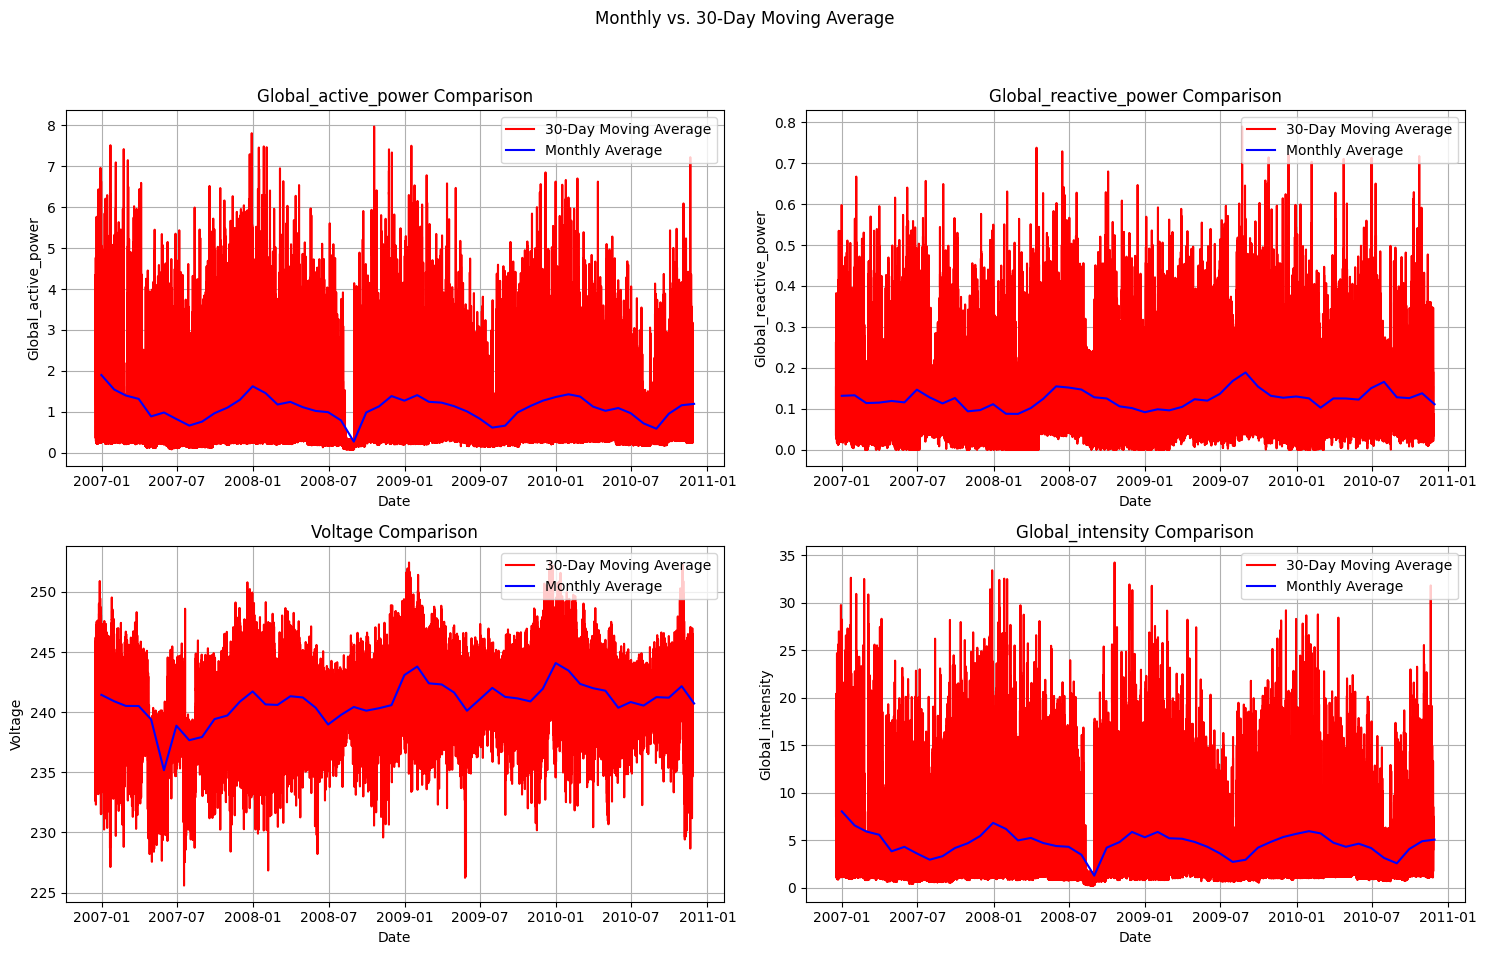

In [109]:
#Plot 30 day Moving Average and Monthly Average for comparison

df_raw = pd.read_csv(file_path, delimiter=';', low_memory=False)

# Data Cleaning
df_raw.replace('?', pd.NA, inplace=True)
df_raw['Datetime'] = pd.to_datetime(df_raw['Date'] + ' ' + df_raw['Time'], format='%d/%m/%Y %H:%M:%S')

# Select relevant columns and create a copy to avoid SettingWithCopyWarning
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                   'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df_new = df_raw[numeric_columns + ['Datetime']].copy()  # Create a copy here

# Convert to numeric using .loc to avoid SettingWithCopyWarning
df_new.loc[:, numeric_columns] = df_new.loc[:, numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values using .loc
df_new.dropna(inplace=True)

# Set Datetime as index
df_new.set_index('Datetime', inplace=True)

# Calculate Monthly Average using 'ME' for month-end frequency
monthly_avg = df_new.resample('ME').mean()

# Calculate 30-Day Moving Average
moving_avg = df_new.rolling(window=30).mean()

# Select variables for plotting
variables_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Monthly vs. 30-Day Moving Average')

# Plot Monthly Averages and 30-Day Moving Averages in the same loop to avoid redundancy
for i, variable in enumerate(variables_to_plot):
    row = i // 2
    col = i % 2

    # Plot 30-Day Moving Average
    axes[row, col].plot(moving_avg.index, moving_avg[variable], label='30-Day Moving Average', color='red')

    # Plot Monthly Average
    axes[row, col].plot(monthly_avg.index, monthly_avg[variable], label='Monthly Average', color='blue')

    # Set titles and labels
    axes[row, col].set_title(f'{variable} Comparison')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel(variable)
    axes[row, col].grid(True)
    axes[row, col].legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()


**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

ANSWER:
### I. Difference Between Moving Average and Monthly Average

**Moving Average**:
- A 30-day moving average is a statistical technique used in data analysis to smooth out short-term fluctuations and identify trends in time-series data. It is calculated by taking the arithmetic mean of the most recent 30 data points.
- A moving average is a statistical calculation that analyzes data points by creating averages from subsets of the data over a specified time period. It is often used in time series analysis to smooth out short-term fluctuations and highlight longer-term trends.
- The moving average is continuously updated as new data points are added. For example, a 30-day moving average will calculate the average of the last 30 days of data, dropping the oldest day as it incorporates the newest day.
- Moving averages can be simple (SMA) or exponential (EMA), with EMAs giving more weight to recent data points, making them more responsive to changes.


**Monthly Average**:
- A monthly average is a statistical measure that represents the central tendency of a set of values over a one-month period. It is commonly used to smooth out short-term fluctuations and identify trends in time-series dataA monthly average calculates the mean of data points for a specific month, summarizing all data within that month into a single value. Each month is treated independently, and averages are computed for each month based on the available data.

## II. OBSERVATIONS OF 30 DAY MOVIGN AVERAGE OF GLOBAL ACTIVE POWER, GLOBAL REACTIVE POWER, VOLTAGE AND GLOBAL INTENSITY:

### Global Active Power
The 30-day moving average of **Global Active Power** exhibits a clear cyclical pattern characterized by pronounced peaks and troughs. These fluctuations likely reflect daily and seasonal variations in energy consumption. The moving average effectively smooths out high-frequency noise in the raw data, making the overall trend more apparent.

### Global Reactive Power
The 30-day moving average for **Global Reactive Power** also shows a cyclical pattern but with higher amplitude fluctuations compared to Global Active Power. This suggests that reactive power consumption experiences greater variability. The moving average helps visualize the overall trend while reducing the impact of short-term noise.

### Voltage
**Voltage** remains relatively stable, with minor fluctuations around a mean value. The 30-day moving average captures this stability well, smoothing out small variations while maintaining the overall trend.

### Global Intensity
Similar to Global Active Power, the 30-day moving average of **Global Intensity** displays a clear cyclical pattern with peaks and troughs. This pattern is expected as intensity is directly related to power consumption. The moving average highlights the overall trend while mitigating the effects of short-term fluctuations.

## Comparison with Monthly Average
### Frequency
- **30-Day Moving Average**: Offers a detailed view of data, capturing shorter-term trends and fluctuations within each month.
- **Monthly Average**: Smooths out data more significantly, providing a broader overview of overall trends but potentially missing finer details.

### Responsiveness to Trends
- **30-Day Moving Average**: More responsive to short-term changes, adapting quickly to data variations.
- **Monthly Average**: Less sensitive to short-term fluctuations due to averaging over a longer period.

### Smoothing
- **30-Day Moving Average**: Provides less smoothing, making it more susceptible to noise and fluctuations.
- **Monthly Average**: Offers a smoother representation of trends due to longer averaging periods.

## III.  Effectiveness for Visualization

### 30-Day Moving Average
- More effective for visualizing short-term trends and fluctuations.
- Reveals subtle changes and patterns within each month that might be obscured by the monthly average.
- Useful for identifying anomalies or unusual events.

### Monthly Average
- Better suited for highlighting long-term trends and seasonal patterns.
- Provides a clearer picture of overall direction and magnitude of changes over extended periods.

## Conclusions

The 30-day moving average provides valuable insights into the short-term dynamics of power consumption, revealing cyclical patterns and fluctuations that may be less apparent in monthly averages.




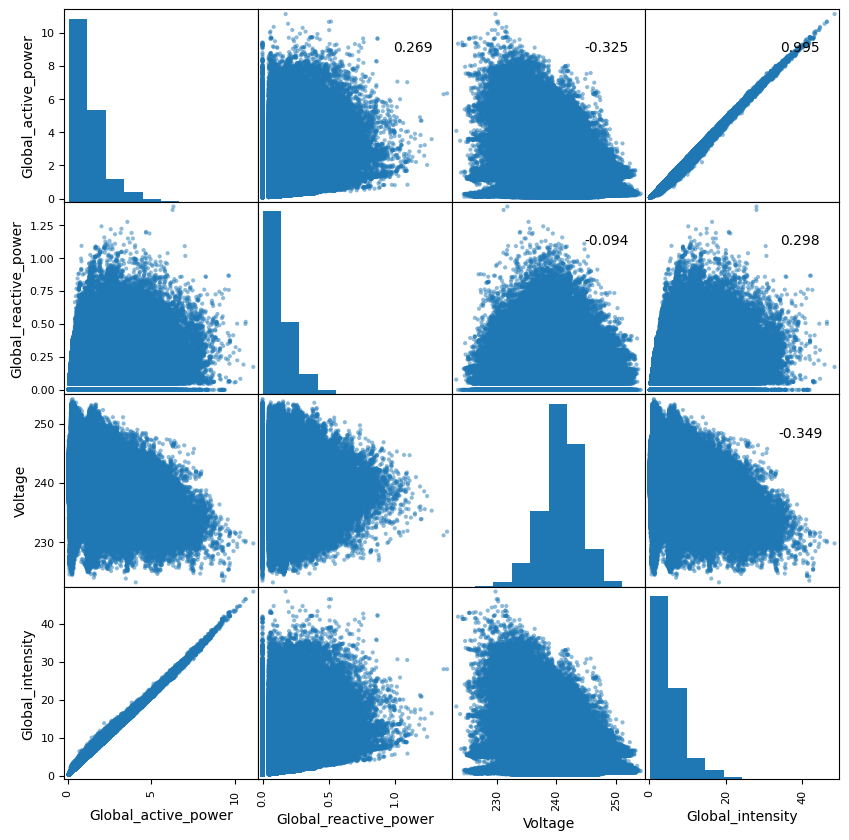

In [110]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

ANSWER:

### Correlation Analysis of Global Power Variables

The correlation matrix for the four global power variables—**Global Active Power**, **Global Reactive Power**, **Voltage**, and **Global Intensity**—provides insights into the relationships between these variables. Below are the correlations:

1. **Global Reactive Power and Global Active Power**: **0.629**
2. **Voltage and Global Active Power**: **-0.325**
3. **Voltage and Global Reactive Power**: **-0.094**
4. **Global Intensity and Voltage**: **-0.349**
5. **Global Intensity and Global Reactive Power**: **0.298**
6. **Global Intensity and Global Active Power**: **0.995**

## ANALYSIS OF CORRELATION MATRIX FOR FOUR GLOBAL POWER VARIABLES IN DATASET:
The following are the analysis of the corelatin matrix:

##a) Global_reactive_power and Global_active_power: Moderate positive correlation (0.629).
This indicates that as Global_active_power increases, Global_reactive_power also tends to increase.
## b) Voltage and Global_active_power: Weak negative correlation (-0.325).
This suggests that as Voltage increases, Global_active_power tends to decrease slightly.
## c)Voltage and Global_reactive_power: Very weak negative correlation (-0.094).
This indicates almost no linear relationship between Voltage and Global_reactive_power.
## d) Global_intensity and Voltage: Weak negative correlation (-0.349).
This suggests that as Voltage increases, Global_intensity tends to decrease slightly.
## e) Global_intensity and Global_reactive_power: Weak positive correlation (0.298).
This indicates that as Global_reactive_power increases, Global_intensity also tends to increase slightly.
##f) Global_intensity and Global_active_power: Very strong positive correlation (0.995):
This indicates that as Global_active_power increases, Global_intensity also increases almost proportionally.

##1)The very strong positive correlation between Global_intensity and Global_active_power (0.995) suggests that these two variables are almost redundant. Including both in a model may lead to multicollinearity issues, making it difficult to determine the individual effect of each variable.
The correlation between Global Intensity and Global Active Power (0.995) is exceptionally high, indicating that as the active power consumption increases, the intensity also increases almost perfectly in sync. This suggests that these two variables are closely related, likely because Global Intensity is a measure of the total current drawn by the household, which directly correlates with the active power being used.

##2) The moderate positive correlation between Global_reactive_power and Global_active_power (0.629) should be considered when using these variables together in a model.
The weak correlations involving Voltage suggest that it may have a different underlying relationship with the other variables, which could be explored further.
The correlation between Global Reactive Power and Global Active Power (0.629) shows a moderate positive relationship, suggesting that higher active power consumption is associated with higher reactive power consumption as well. This is typical in AC systems where reactive power is needed to maintain voltage levels.

## 3) Negative Correlations:
The negative correlation between Voltage and both Global Active Power (-0.325) and Global Intensity (-0.349) indicates that as voltage decreases, both active power and intensity tend to increase. This could suggest that when the system experiences lower voltage levels, more current (intensity) is required to maintain power delivery, which can lead to increased active power consumption.
Weak Correlation:
The correlation between Voltage and Global Reactive Power (-0.094) is very weak, indicating little to no linear relationship between these two variables.
Low Positive Correlation Between Voltage and Global Reactive Power:
The weak correlation suggests that changes in voltage have minimal direct impact on reactive power in this dataset.

### Implications for Downstream Tasks

1. **Predictive Modeling**:
   - Understanding these correlations is crucial for building predictive models in energy management systems or demand forecasting applications. For instance, knowing that Global Intensity can predict Global Active Power with high accuracy allows for simpler models that focus on measuring intensity to estimate active power usage.

2. **Anomaly Detection**:
   - The strong correlations can help in anomaly detection systems where deviations from expected relationships (like a sudden drop in voltage with an increase in active power) could indicate issues such as equipment failure or inefficiencies.

3. **Energy Efficiency Programs**:
   - Insights from this analysis can inform energy efficiency programs by identifying how different variables interact under various load conditions, helping to optimize energy consumption strategies.

4. **System Design Considerations**:
   - In designing electrical systems or smart grids, understanding these correlations can guide decisions regarding infrastructure investments, such as where to place capacitors or how to manage loads effectively to maintain voltage levels.

5. **Real-Time Monitoring Systems**:
   - For real-time monitoring systems, knowing the relationships allows for better alerts and responses to changes in system performance, ensuring stability and reliability.

### Conclusion

The correlation analysis reveals significant relationships among global power variables, particularly between Global Active Power and Global Intensity, which can be leveraged in various downstream applications such as predictive modeling, anomaly detection, and energy management strategies. Understanding these correlations enhances our ability to make informed decisions regarding energy usage, system design, and operational efficiency in smart grid applications.
